# 이미지 특징 추출

### 이미지 미분
가로/세로 위치 변화에 따른 픽셀 값의 변화율을 이미지의 도함수(Image derivatives) 라고 한다. 다음 식에서 𝑓(𝑥)는 𝑥위치의 픽셀 명도이다.

$ g_{x} = \frac{∂𝑓}{∂𝑥}, g_{y} = \frac{∂𝑓}{∂𝑦} $  

x, y 방향의 도함수의 크기를 구하는 것이 라플라스 연산이다.  

$ g = \sqrt{{g_{x}}^{2} + {g_{y}}^{2}} $  

실제 이미지 프로세싱에서는 다음과 같은 중앙차분법(central difference)을 사용한다.  

$ G(x) = f(x+1) - f(x-1) \approx \begin{bmatrix} -1 & 0 & 1 \end{bmatrix} $  

이 연산은 다음 이미지 커널을 사용하여 필터링한 것과 같다.  
$ k = [1, 0, -1] $

### 엣지 추출
경계선을 인지하는 것을 엣지 추출(egde detection)이라고 한다. 엣지(경계선)는 이미지 안에서 픽셀의 값이 값자기 변하는 곳이다. 따라서 엣지 추출을 하는 알고리즘은 이미지를 미분한 그레디언트(gradient) 벡터의 크기로 판단한다. 대표적인 엣지 추출 알고리즘으로 Sobel edge Detection과 Canny edge Dectenction이 있다.  

OpenCV 에서 Sobel edge Detection은 Sobel, Laplacian 명령으로 구현한다.

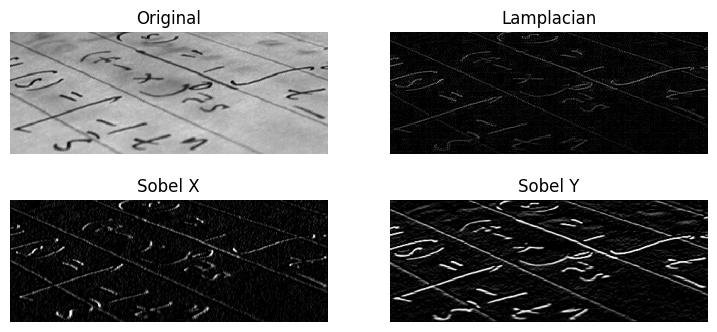

In [1]:
from skimage.data import text
import cv2
import matplotlib.pyplot as plt

img = text()

sobelx = cv2.Sobel(img, cv2.CV_8U, 1, 0, ksize=3)
sobely = cv2.Sobel(img, cv2.CV_8U, 0, 1, ksize=3)
laplacian = cv2.Laplacian(img, cv2.CV_8U)

plt.figure(figsize=(9, 4))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("Original")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(laplacian, cmap="gray")
plt.title("Lamplacian")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(sobelx, cmap="gray")
plt.title("Sobel X")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(sobely, cmap="gray")
plt.title("Sobel Y")
plt.axis("off")

plt.show()

### 캐니 엣지 추출
캐니 엣지 추출법은 그레디언트의 크기 뿐 아니라 방향도 사용한다. 또한 국부 최대 값 근처의 그레디언트값을 제거하는 Nonmaximal suppressioin을 이용하여 가짜 엣지를 제거한다. 마지막으로 두 개의 기준값(threshold)을 사용해서 엣지를 구분한다.  

아래 코드는 canny 함수를 사용하여 이미지의 엣지를 추출한다. 기준값으로는 50과 100을 사용하였다.

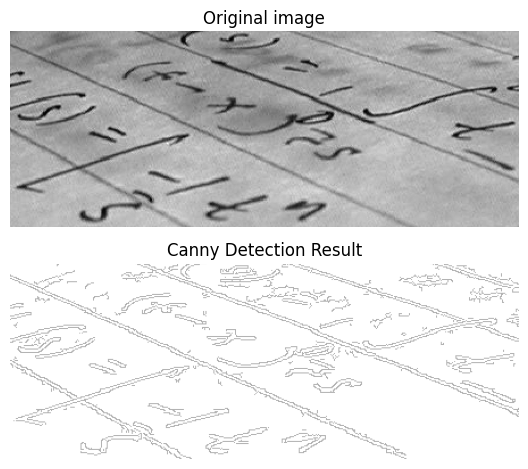

In [2]:
img = text()
edges = cv2.Canny(img, 50, 100)

plt.subplot(2, 1, 1)
plt.imshow(img, cmap="gray")
plt.title("Original image")
plt.axis("off")

plt.subplot(2, 1, 2)
plt.imshow(edges, cmap="Greys", alpha=0.3)
plt.axis("off")
plt.title("Canny Detection Result")

plt.tight_layout()
plt.show()
